<center><img src="redpopcorn.jpg"></center>

# Unearthing Nostalgia: An Exploratory Data Analysis of 1990s Movies on Netflix

## Project Overview

Netflix, evolving from a DVD rental service in 1997, has become a global entertainment giant. This project delves into Netflix's extensive dataset to specifically investigate movies released in the 1990s. As a production company specializing in nostalgic styles, the goal is to uncover trends, characteristics, and popular features of films from this iconic decade available on the platform.

This exploratory data analysis (EDA) aims to answer questions such as:
* What were the typical durations of 90s movies on Netflix?
* Are there specific genres that were more prevalent or shorter in duration during this period?

## The Data

The analysis uses the `netflix_data.csv` dataset. Below is a detailed description of its columns:

### `netflix_data.csv` Column Definitions

| Column       | Description                          |
|--------------|--------------------------------------|
| `show_id`    | Unique ID for the show               |
| `type`       | Type of content (Movie or TV Show)   |
| `director`   | Director(s) of the show              |
| `cast`       | Main cast members                    |
| `country`    | Country of origin                    |
| `date_added` | Date the content was added to Netflix|
| `release_year`| Original release year of the content|
| `duration`   | Duration of the show in minutes (for movies) or seasons (for TV shows) |
| `description`| A brief synopsis of the show         |
| `genre`      | Primary genre of the show            |

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Load the Netflix dataset
netflix_df = pd.read_csv("netflix_data.csv")

# Display the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(netflix_df.head())

# Display column information and non-null counts
print("\nDataset Information:")
netflix_df.info()

First 5 rows of the dataset:
  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1,

## Data Preprocessing: Focusing on Movies

The dataset contains both movies and TV shows. For this analysis, we are specifically interested in cinematic releases. Therefore, the first step in our preprocessing is to filter the DataFrame to include only entries where the 'type' column is 'Movie'. We also select only the relevant columns for our analysis to keep the DataFrame lean.

In [26]:
# Filter out TV shows to focus solely on movies
movies_df = netflix_df[netflix_df["type"] == "Movie"]

# Select relevant columns for movie analysis
movies_df = movies_df[["title", "country", "genre", "release_year", "duration"]]

# Display the first few rows of the filtered movies DataFrame
print("First 5 rows of the movies DataFrame:")
print(movies_df.head())

# Confirm the data types and non-null counts for the filtered DataFrame
print("\nMovies DataFrame Information:")
movies_df.info()

First 5 rows of the movies DataFrame:
   title        country          genre  release_year  duration
0   7:19         Mexico         Dramas          2016        93
1  23:59      Singapore  Horror Movies          2011        78
2      9  United States         Action          2009        80
3     21  United States         Dramas          2008       123
5    122          Egypt  Horror Movies          2019        95

Movies DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4677 entries, 0 to 4811
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4677 non-null   object
 1   country       4677 non-null   object
 2   genre         4677 non-null   object
 3   release_year  4677 non-null   int64 
 4   duration      4677 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 219.2+ KB


## Isolating the 1990s: A Decade of Interest

Our objective is to study movies from the 1990s. We will further filter our `movies_df` to include only those films released between 1990 and 1999 (inclusive) based on the `release_year` column.

In [27]:
# Filter movies to include only those released in the 1990s
movies_90s_df = movies_df[(movies_df["release_year"] >= 1990) & (movies_df["release_year"] <= 1999)]

# Display the first few rows of the 90s movies DataFrame
print("First 5 rows of 1990s movies DataFrame:")
print(movies_90s_df.head())

# Check the number of movies from the 90s
print(f"\nTotal 90s movies in the dataset: {len(movies_90s_df)}")

First 5 rows of 1990s movies DataFrame:
                               title        country     genre  release_year  \
6                                187  United States    Dramas          1997   
118                A Dangerous Woman  United States    Dramas          1993   
145           A Night at the Roxbury  United States  Comedies          1998   
167  A Thin Line Between Love & Hate  United States  Comedies          1996   
194                     Aashik Awara          India    Dramas          1993   

     duration  
6         119  
118       101  
145        82  
167       108  
194       154  

Total 90s movies in the dataset: 183


## Analyzing Movie Durations in the 1990s

One key aspect of our analysis is understanding the typical length of movies released in the 1990s. A histogram of the `duration` column for `movies_90s_df` will provide insight into the distribution of movie runtimes.

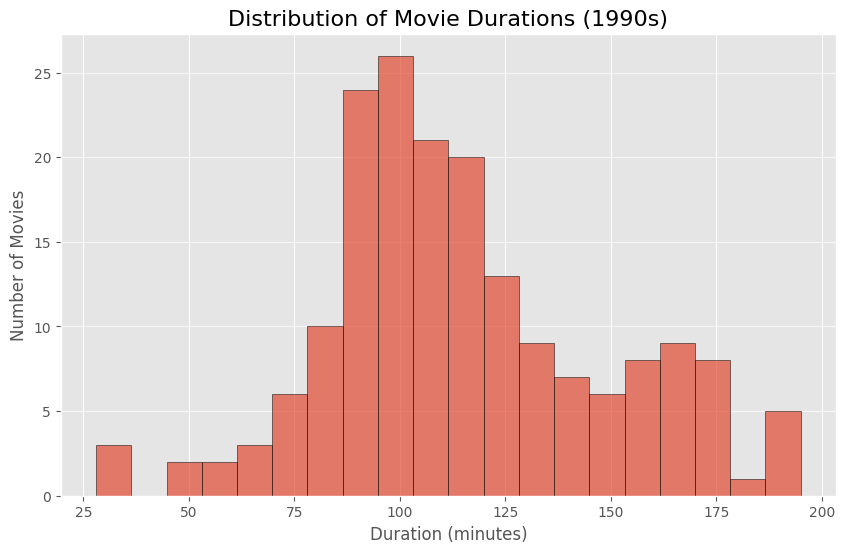


The most frequent movie duration in the 1990s was: 94 minutes


In [28]:
# Set the style for the plot
plt.style.use('ggplot') # Using 'ggplot' style for a more polished look

# Create the histogram for movie durations
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.hist(movies_90s_df["duration"], bins=20, edgecolor='black', alpha=0.7) # Added bins, edge color, and alpha

# Add titles and labels
plt.title("Distribution of Movie Durations (1990s)", fontsize=16)
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75) # Improve grid visibility

plt.show()

# Calculate the most frequent movie duration
most_frequent_duration = movies_90s_df["duration"].mode()[0]
print(f"\nThe most frequent movie duration in the 1990s was: {most_frequent_duration} minutes")